**Estudo Detalhado de Visualização de Dados em Python com Matplotlib e Seaborn**

A visualização de dados desempenha um papel crucial na análise e comunicação de informações. Através de representações gráficas, torna-se possível identificar padrões, tendências e insights que seriam difíceis de discernir em dados brutos. No contexto da análise de dados em Python, as bibliotecas Matplotlib e Seaborn se destacam como ferramentas poderosas para a criação de visualizações eficazes.¹

**1. Matplotlib: A Fundação da Visualização em Python**

O Matplotlib é a biblioteca fundamental para a geração de gráficos em Python, oferecendo um controle abrangente sobre cada elemento da visualização.² Sua arquitetura é composta por diversos componentes que trabalham em conjunto para produzir gráficos de alta qualidade.

**(a) Arquitetura do Matplotlib: `pyplot`, `figure`, `axes` e `artist`**

A arquitetura do Matplotlib é construída em torno de uma hierarquia de objetos. O módulo `pyplot` fornece uma interface de estilo MATLAB para muitas funcionalidades de plotagem, tornando a criação de gráficos simples e rápida.¹ No entanto, para um controle mais avançado, é importante entender os papéis de `figure`, `axes` e `artist`.

* **Figure:** O objeto `Figure` representa a janela ou a página onde o gráfico é desenhado. É o contêiner de nível mais alto que pode conter múltiplos `Axes`, títulos, legendas, etc.¹ Cria-se com `plt.figure()`.
* **Axes:** O objeto `Axes` é uma região retangular dentro da `Figure` que contém o gráfico (dados, eixos, rótulos, título). Um `Figure` pode ter múltiplos `Axes` (subplots).¹
* **Artist:** Quase tudo que se vê na figura é um `Artist` (o `Axes`, linhas, textos, retângulos, etc.). São os objetos desenhados.¹

A interação é: cria-se uma `Figure`, adicionam-se `Axes` a ela, e plota-se dados nos `Axes` usando funções que criam `Artists`.

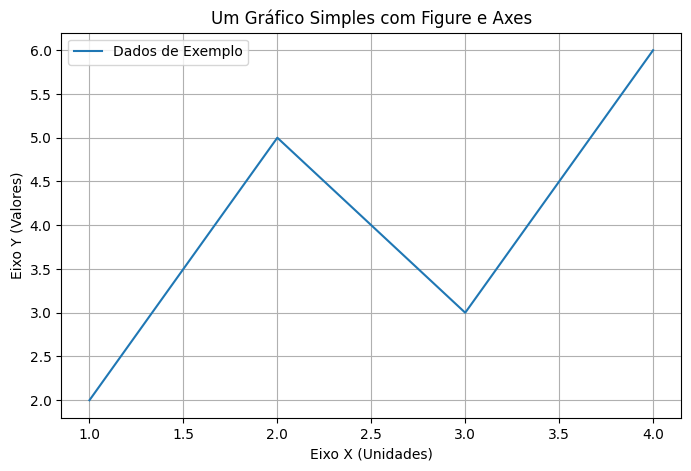

In [5]:
import matplotlib.pyplot as plt
import numpy as np # NumPy é frequentemente usado com Matplotlib

# Cria uma figura e um conjunto de eixos (Axes)
fig, ax = plt.subplots(figsize=(8, 5)) # plt.subplots() é um atalho comum

# Dados de exemplo
x_data = np.array([1, 2, 3, 4])
y_data = np.array([2, 5, 3, 6])

# Plota dados no objeto Axes (cria um Artist Line2D)
# Corrigido: Adicionado y_data
line_artist, = ax.plot(x_data, y_data, label='Dados de Exemplo')

# Define o título do objeto Axes (cria um Artist Text)
ax.set_title('Um Gráfico Simples com Figure e Axes')

# Define os rótulos dos eixos (cria Artists Text)
ax.set_xlabel('Eixo X (Unidades)')
ax.set_ylabel('Eixo Y (Valores)')

# Adiciona uma legenda (cria um Artist Legend)
ax.legend()

# Adiciona grid (modifica Artists dos eixos)
ax.grid(True)

# Exibe a figura
plt.show()

Neste exemplo, `fig` é a Figure, `ax` é o Axes, e a linha plotada, título, rótulos e legenda são objetos Artist.

**(b) Criação de Figuras e Subplots**

* **`plt.figure()`:** Cria uma nova figura, permitindo configurar `figsize` (tamanho em polegadas), `dpi` (resolução), etc.

In [6]:
fig_grande = plt.figure(figsize=(12, 6), dpi=100)
ax_grande = fig_grande.add_subplot(1, 1, 1) # Adiciona um Axes à figura criada
ax_grande.set_title("Figura Grande com Alta Resolução")
# plt.show() # Descomente para exibir esta figura separadamente
plt.close(fig_grande) # Fecha a figura para não exibir agora

* **Adicionando Subplots:**
    * `fig.add_subplot(nrows, ncols, index)`: Adiciona Axes a uma `Figure` existente numa grade. `index` começa em 1.
    * `plt.subplot(nrows, ncols, index)`: Adiciona Axes à figura *atual*, criando uma se necessário.
    * `plt.subplots(nrows, ncols, ...)`: Função conveniente que cria a `Figure` e uma grade de `Axes` de uma vez, retornando a figura e um array NumPy de `Axes`. **(Método geralmente preferido)**.

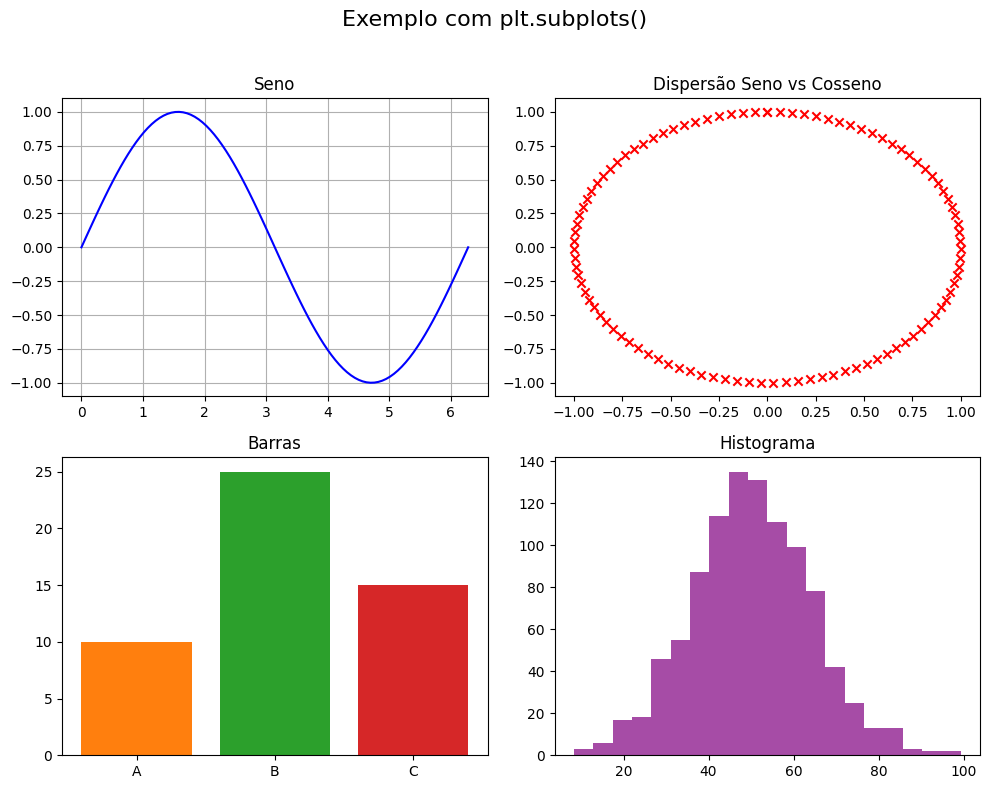

In [7]:
# Criando subplots com plt.subplots() (método preferido)
# Cria uma figura e uma grade 2x2 de Axes. 'axs' é um array NumPy 2x2.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Exemplo com plt.subplots()', fontsize=16) # Título geral da figura

# Dados para os subplots
x = np.linspace(0, 2 * np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
dados_bar = {'A': 10, 'B': 25, 'C': 15}
dados_hist = np.random.randn(1000) * 15 + 50 # Média 50, desvio 15

# Acessando Axes pelo índice do array (linha, coluna)
# Subplot 0,0 (superior esquerdo)
axs[0, 0].plot(x, y_sin, color='blue')
axs[0, 0].set_title('Seno')
axs[0, 0].grid(True)

# Subplot 0,1 (superior direito)
axs[0, 1].scatter(y_sin, y_cos, color='red', marker='x')
axs[0, 1].set_title('Dispersão Seno vs Cosseno')

# Subplot 1,0 (inferior esquerdo)
axs[1, 0].bar(dados_bar.keys(), dados_bar.values(), color=['#ff7f0e', '#2ca02c', '#d62728']) # Cores específicas
axs[1, 0].set_title('Barras')

# Subplot 1,1 (inferior direito)
axs[1, 1].hist(dados_hist, bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Histograma')

# Ajusta o espaçamento para evitar sobreposição de títulos/rótulos
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta para caber o suptitle
plt.show()

**(c) Criação e Personalização de Gráficos Comuns**

O Matplotlib cria diversos tipos de gráficos.

* **Gráficos de Linha (`plt.plot()` ou `ax.plot()`):** Ideal para visualizar tendências ao longo do tempo ou sequências.

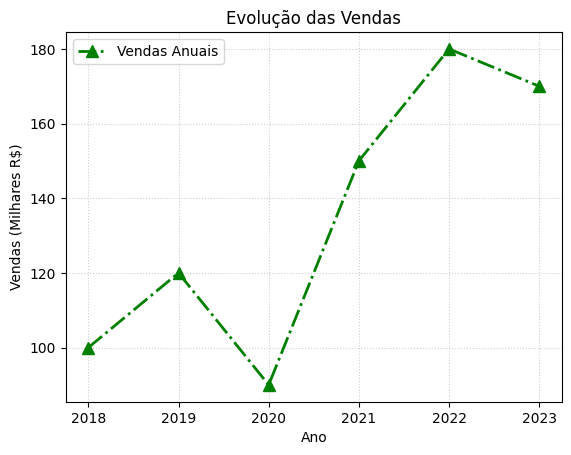

In [8]:
# Gráfico de Linha Personalizado
anos = np.array([2018, 2019, 2020, 2021, 2022, 2023])
vendas = np.array([100, 120, 90, 150, 180, 170])

fig, ax = plt.subplots()
ax.plot(anos, vendas, color='green', linestyle='-.', marker='^', linewidth=2, markersize=8, label='Vendas Anuais')
ax.set_xlabel('Ano')
ax.set_ylabel('Vendas (Milhares R$)')
ax.set_title('Evolução das Vendas')
ax.legend() # Mostra a legenda definida no label do plot
ax.grid(True, linestyle=':', alpha=0.6)
plt.show()

* `color`, `linestyle`, `marker`, `linewidth`, `markersize`, `label` são alguns parâmetros de personalização. `ax.legend()` exibe a legenda.

* **Gráficos de Dispersão (`plt.scatter()` ou `ax.scatter()`):** Mostra a relação entre duas variáveis numéricas. Útil para identificar correlações.

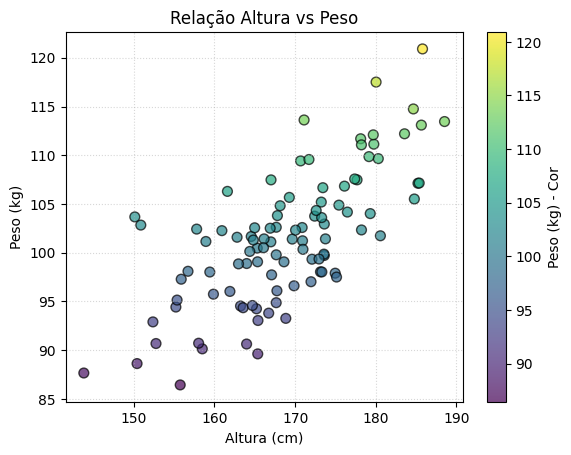

In [9]:
# Gráfico de Dispersão Personalizado (Relação Peso x Altura - Dados Simulados)
np.random.seed(42) # para reprodutibilidade
alturas = np.random.normal(170, 10, 100) # Média 170cm, desvio 10cm
pesos = 0.6 * alturas + np.random.normal(0, 5, 100) # Relação linear com ruído

fig, ax = plt.subplots()
# 's' controla tamanho, 'c' a cor (pode ser outra variável!), 'alpha' a transparência
scatter = ax.scatter(alturas, pesos, s=50, c=pesos, cmap='viridis', alpha=0.7, edgecolors='k')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')
ax.set_title('Relação Altura vs Peso')
fig.colorbar(scatter, label='Peso (kg) - Cor') # Adiciona barra de cores
ax.grid(True, linestyle=':', alpha=0.5)
plt.show()

* `s` (tamanho), `c` (cor, pode mapear para uma variável usando `cmap`), `marker`, `alpha`, `edgecolors`. `fig.colorbar()` adiciona legenda de cores.

* **Gráficos de Barras (`plt.bar()` / `ax.bar()`, `plt.barh()` / `ax.barh()`):** Compara valores entre categorias discretas.

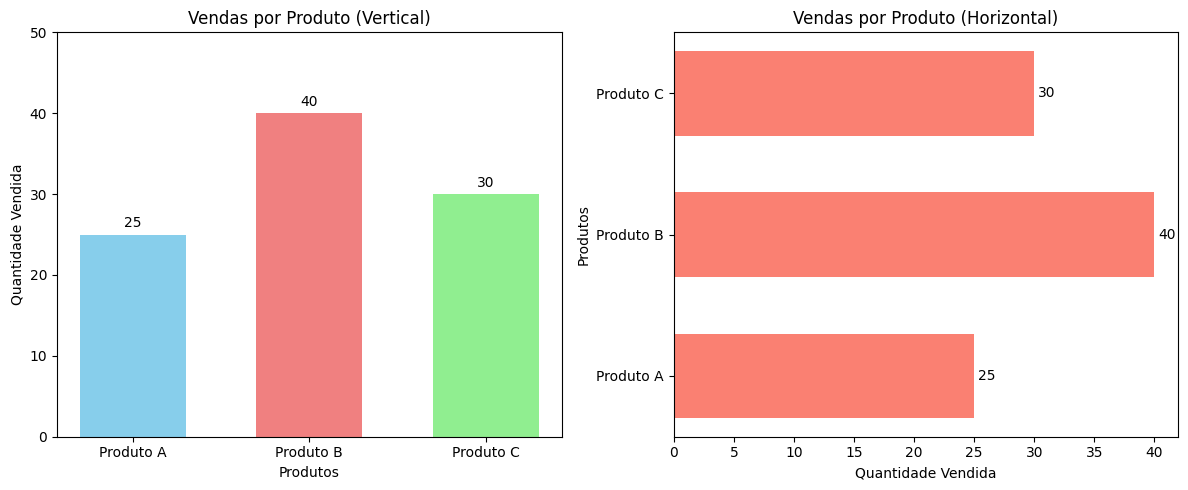

In [10]:
# Gráficos de Barras Vertical e Horizontal
categorias = ['Produto A', 'Produto B', 'Produto C']
valores = [25, 40, 30]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # 1 linha, 2 colunas

# Vertical
barras_v = ax1.bar(categorias, valores, width=0.6, color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_xlabel('Produtos')
ax1.set_ylabel('Quantidade Vendida')
ax1.set_title('Vendas por Produto (Vertical)')
ax1.set_yticks(np.arange(0, 51, 10)) # Define os ticks do eixo Y
ax1.bar_label(barras_v, padding=3) # Adiciona rótulos de valor acima das barras

# Horizontal
barras_h = ax2.barh(categorias, valores, height=0.6, color='salmon')
ax2.set_xlabel('Quantidade Vendida')
ax2.set_ylabel('Produtos')
ax2.set_title('Vendas por Produto (Horizontal)')
ax2.bar_label(barras_h, padding=3) # Adiciona rótulos de valor ao lado das barras

plt.tight_layout()
plt.show()

* `width` (vertical), `height` (horizontal), `color`. `ax.bar_label()` adiciona os valores às barras.

* **Histogramas (`plt.hist()` ou `ax.hist()`):** Mostra a distribuição de frequência de uma variável numérica contínua.

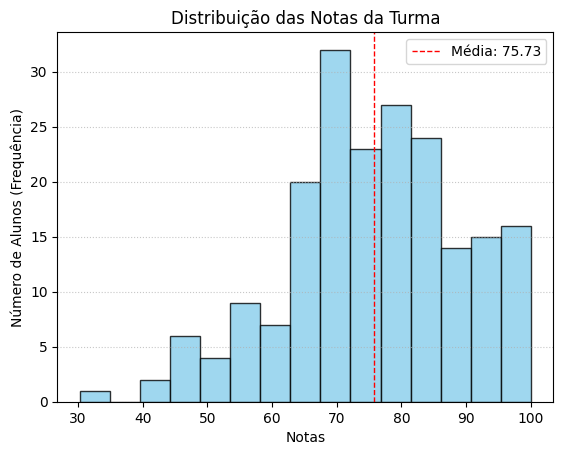

In [11]:
# Histograma Personalizado (Distribuição de Notas)
np.random.seed(10)
notas = np.random.normal(75, 15, 200) # Média 75, desvio 15, 200 alunos
notas = np.clip(notas, 0, 100) # Garante que as notas fiquem entre 0 e 100

fig, ax = plt.subplots()
# bins define o número de barras, density=True normaliza para área total ser 1
# histtype='stepfilled' dá um contorno preenchido
contagens, limites_bins, patches = ax.hist(notas, bins=15, density=False, color='skyblue', edgecolor='black', alpha=0.8)
ax.set_xlabel('Notas')
ax.set_ylabel('Número de Alunos (Frequência)')
ax.set_title('Distribuição das Notas da Turma')
ax.grid(axis='y', linestyle=':', alpha=0.7)
# Adiciona linha da média
media_notas = np.mean(notas)
ax.axvline(media_notas, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_notas:.2f}')
ax.legend()
plt.show()

* `bins` (número ou limites dos intervalos), `density` (normalizar), `color`, `edgecolor`, `alpha`. `ax.axvline()` adiciona uma linha vertical.

* **Gráficos de Pizza (`plt.pie()` ou `ax.pie()`):** Mostra a proporção de categorias em um todo. Usar com cautela, barras podem ser mais claras para comparação.

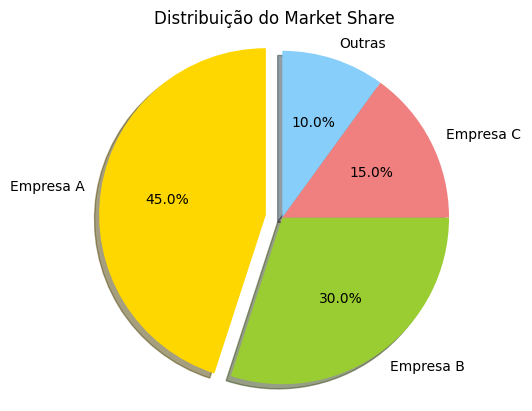

In [12]:
# Gráfico de Pizza Personalizado (Market Share)
# Corrigido: Adicionado labels e sizes
labels = ['Empresa A', 'Empresa B', 'Empresa C', 'Outras']
sizes = [45, 30, 15, 10] # Percentuais ou valores
explode = (0.1, 0, 0, 0)  # Destaca a primeira fatia ('Empresa A')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
ax.axis('equal')  # Garante que o gráfico seja um círculo.
ax.set_title('Distribuição do Market Share')
plt.show()

* `explode` (destacar fatias), `labels`, `autopct` (formato percentual), `shadow`, `startangle`, `colors`. `ax.axis('equal')` torna circular.

* **Gráficos de Erro (`plt.errorbar()` ou `ax.errorbar()`):** Visualiza dados com suas incertezas ou erros. Comum em dados científicos/experimentais.

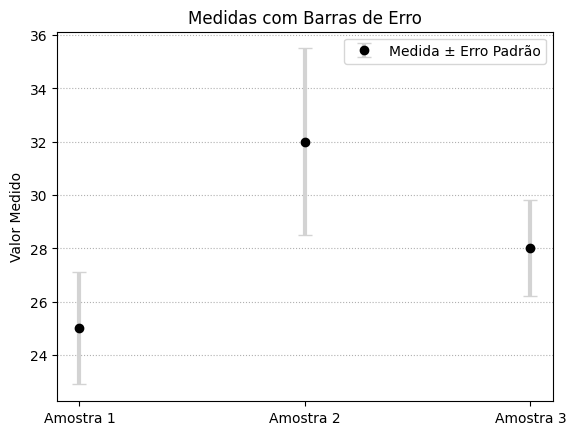

In [13]:
# Gráfico com Barras de Erro
categorias = ['Amostra 1', 'Amostra 2', 'Amostra 3']
medias = np.array([25, 32, 28])
erros_padrao = np.array([2.1, 3.5, 1.8]) # Exemplo de erro (desvio padrão, erro padrão, etc.)

fig, ax = plt.subplots()
ax.errorbar(categorias, medias, yerr=erros_padrao, fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=5, label='Medida ± Erro Padrão')
# fmt controla o marcador do ponto central
# yerr define o tamanho do erro vertical
# ecolor, elinewidth, capsize controlam aparência da barra de erro

ax.set_ylabel('Valor Medido')
ax.set_title('Medidas com Barras de Erro')
ax.legend()
ax.grid(axis='y', linestyle=':')
plt.show()

**(d) Personalização de Gráficos**

Matplotlib permite ajustar quase todos os elementos.

* **Títulos e Rótulos:** `ax.set_title()`, `ax.set_xlabel()`, `ax.set_ylabel()`. Parâmetro `fontsize`.
* **Limites dos Eixos:** `ax.set_xlim()`, `ax.set_ylim()`.
* **Legendas:** `ax.plot(..., label='...')`, `ax.legend(loc='...')`. `loc` controla a posição.
* **Anotações:** `ax.annotate('Texto', xy=(x,y), xytext=(xt,yt), arrowprops=...)`.
* **Estilos Predefinidos:** `plt.style.use('nome_do_estilo')`. Experimente `'ggplot'`, `'seaborn-v0_8-darkgrid'`, `'fivethirtyeight'`.

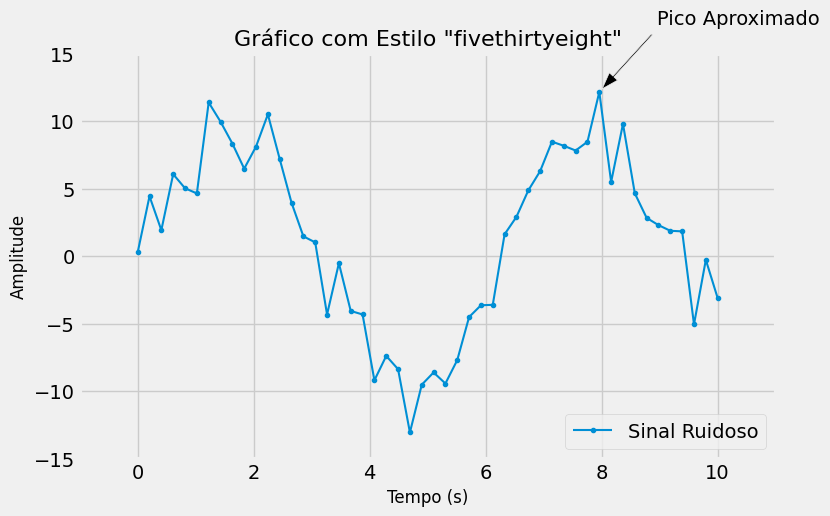

In [14]:
# Exemplo usando Estilo e outras personalizações
plt.style.use('fivethirtyeight') # Aplica um estilo predefinido

fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, 10, 50)
y = np.sin(x) * 10 + np.random.randn(50) * 2 # Seno com ruído

ax.plot(x, y, marker='.', linestyle='-', linewidth=1.5, label='Sinal Ruidoso')
ax.set_title('Gráfico com Estilo "fivethirtyeight"', fontsize=16)
ax.set_xlabel('Tempo (s)', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_xlim(-1, 11) # Define limites
ax.set_ylim(-15, 15)
ax.legend(loc='lower right') # Posição da legenda
# Adiciona anotação
ponto_max_idx = np.argmax(y)
ax.annotate('Pico Aproximado',
            xy=(x[ponto_max_idx], y[ponto_max_idx]), # Ponto a anotar
            xytext=(x[ponto_max_idx]+1, y[ponto_max_idx]+5), # Posição do texto
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

plt.show()
# Resetar para estilo padrão depois
plt.style.use('default')

**(e) Múltiplos Subplots e Compartilhamento de Eixos**

`plt.subplots(..., sharex=True, sharey=True)` compartilha eixos, útil para comparação.

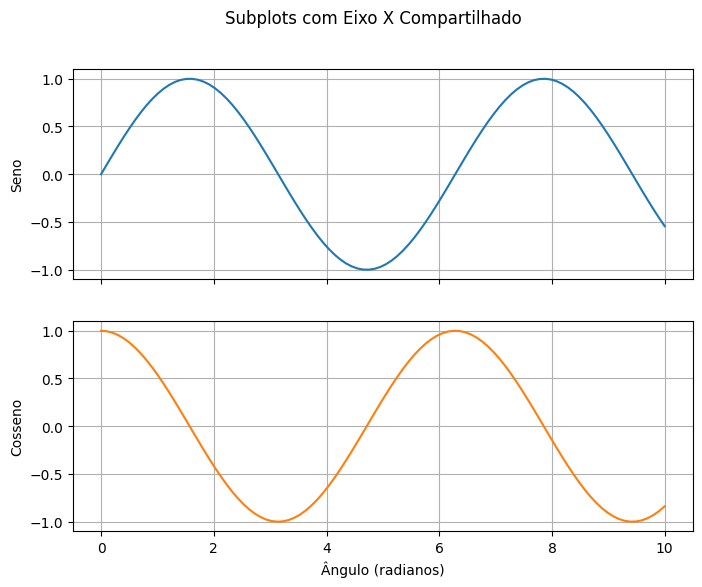

In [15]:
# Subplots com eixos compartilhados
# Corrigido: Indexação axs e dados adicionados
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6)) # 2 linhas, 1 coluna, compartilha X
fig.suptitle('Subplots com Eixo X Compartilhado')

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Acessando Axes por índice simples (pois é um array 1D de Axes)
axs[0].plot(x, y1, color='tab:blue')
axs[0].set_ylabel('Seno')
axs[0].grid(True)

axs[1].plot(x, y2, color='tab:orange')
axs[1].set_xlabel('Ângulo (radianos)')
axs[1].set_ylabel('Cosseno')
axs[1].grid(True)

# O zoom/pan no eixo X afetará ambos os gráficos
plt.show()

Ajuste de espaçamento: `plt.tight_layout()` (automático) ou `plt.subplots_adjust(...)` (manual).

**(f) Salvando Gráficos**

`plt.savefig(nome_arquivo, format='png', dpi=300, bbox_inches='tight')`.
* `format`: 'png', 'jpg', 'pdf', 'svg', etc.
* `dpi`: Resolução.
* `bbox_inches='tight'`: Tenta ajustar a figura para não cortar rótulos.

In [16]:
# Exemplo de salvar figura
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [5, 2, 8])
ax.set_title("Gráfico para Salvar")

# Salvar em diferentes formatos
try:
  fig.savefig('grafico_salvo.png', dpi=150, bbox_inches='tight')
  fig.savefig('grafico_salvo.pdf', bbox_inches='tight')
  print("\nGráfico salvo em .png e .pdf")
except Exception as e:
  print(f"\nErro ao salvar gráfico: {e}")
plt.close(fig) # Fecha a figura para não exibir


Gráfico salvo em .png e .pdf


**(g) Personalização Avançada de Cores, Marcadores e Estilos de Linha**

A documentação do Matplotlib³ oferece detalhes sobre `colormaps`, personalização de marcadores e estilos de linha complexos.

**(h) Animações Básicas com `matplotlib.animation`**

Permite criar animações atualizando gráficos.

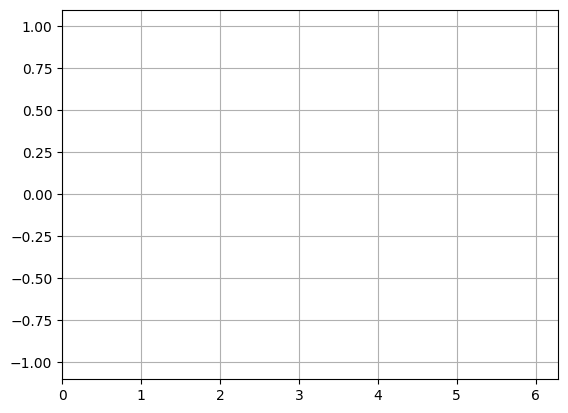

In [17]:
# Animação Básica (requer instalação adicional como ffmpeg ou imagemagick para salvar como vídeo/gif)
import matplotlib.animation as animation

fig, ax = plt.subplots()
x_anim = np.linspace(0, 2 * np.pi, 120)
# Corrigido: Inicializa a linha com dados vazios ou os dados do primeiro frame
line, = ax.plot([], [], lw=2) # Começa com linha vazia
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)
ax.grid(True)

def init(): # Função para inicializar o plot (opcional mas boa prática)
  line.set_data([], [])
  return line,

def update(frame): # Função chamada para cada frame
  y = np.sin(x_anim + frame / 20.0)
  line.set_data(x_anim, y)
  ax.set_title(f'Animação Seno - Frame {frame}')
  return line,

# Cria a animação
# frames: número de frames a gerar
# interval: delay entre frames em ms
# blit=True: otimização para redesenhar apenas o que mudou
ani = animation.FuncAnimation(fig, update, frames=200, init_func=init, interval=30, blit=True)

# Para exibir no notebook/script:
# plt.show()

# Para salvar (exemplo como GIF, pode requerer 'imagemagick' ou 'pillow'):
# try:
#     ani.save('animacao_seno.gif', writer='pillow', fps=30)
#     print("\nAnimação salva como animacao_seno.gif")
# except Exception as e:
#     print(f"\nErro ao salvar animação (pode precisar de 'pillow' ou outra dependência): {e}")

plt.show() # Exibe a animação interativamente
plt.close(fig)

**(i) Gráficos 3D com `mpl_toolkits.mplot3d`**

Toolkit para visualização tridimensional.

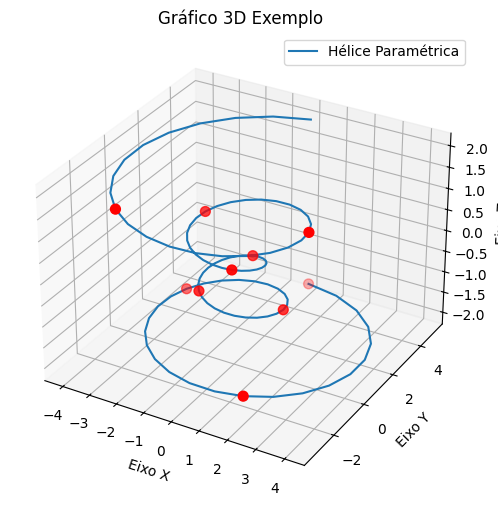

In [18]:
# Gráfico 3D
# from mpl_toolkits.mplot3d import Axes3D # Import implícito em versões recentes ao usar projection='3d'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Dados de exemplo para 3D (ex: hélice)
# Corrigido: Definidos x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='Hélice Paramétrica') # Gráfico de linha 3D
ax.scatter(x[::10], y[::10], z[::10], c='red', marker='o', s=50) # Adiciona pontos de dispersão

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
ax.set_title('Gráfico 3D Exemplo')
ax.legend()

plt.show()

**(j) Integração com NumPy e Pandas**

Matplotlib integra-se nativamente com NumPy arrays. DataFrames Pandas também podem ser plotados diretamente (usando Matplotlib por baixo).


--- Integração Matplotlib / Pandas ---
DataFrame de Exemplo:
        Data  Valor Acumulado
0 2024-01-01        -0.132574
1 2024-01-02        -0.422819
2 2024-01-03        -1.376352
3 2024-01-04        -0.788311
4 2024-01-05        -0.719510


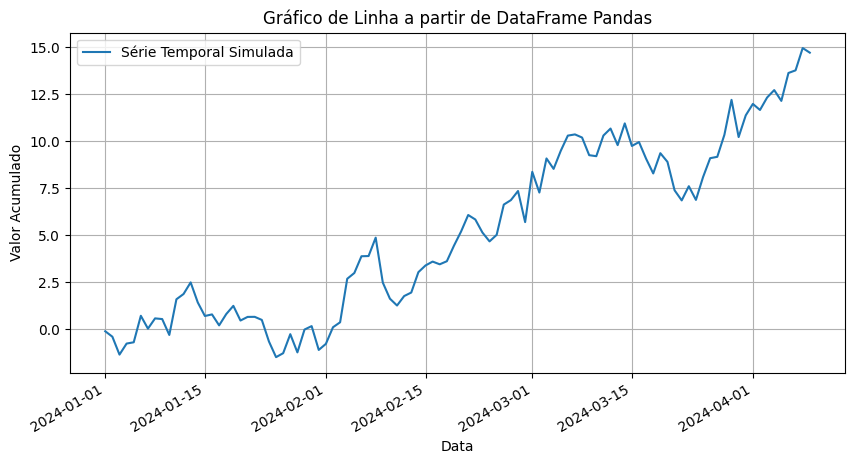

In [19]:
# Integração com Pandas e NumPy
import pandas as pd

# Cria um DataFrame Pandas com dados simulados
datas = pd.date_range('2024-01-01', periods=100, freq='D')
valores_np = np.random.randn(100).cumsum() # Random walk
df = pd.DataFrame({'Data': datas, 'Valor Acumulado': valores_np})

print("\n--- Integração Matplotlib / Pandas ---")
print("DataFrame de Exemplo:")
print(df.head())

# Plotando diretamente do DataFrame
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['Data'], df['Valor Acumulado'], label='Série Temporal Simulada')
ax.set_xlabel('Data')
ax.set_ylabel('Valor Acumulado')
ax.set_title('Gráfico de Linha a partir de DataFrame Pandas')
ax.legend()
ax.grid(True)
fig.autofmt_xdate() # Formata as datas no eixo X
plt.show()

# Pandas também tem métodos .plot() que usam Matplotlib
# df.plot(x='Data', y='Valor Acumulado', kind='line', title='Plot direto do Pandas', grid=True)
# plt.show()

**2. Seaborn: Visualização Estatística Aprimorada**

**(a) Introdução ao Seaborn**

Seaborn é construída sobre Matplotlib, focada em visualizações **estatísticas** atraentes e informativas.² Simplifica gráficos complexos, tem melhor estética padrão e integra-se com DataFrames Pandas.

In [20]:
# Importando Seaborn (convenção)
import seaborn as sns
import matplotlib.pyplot as plt # Seaborn usa Matplotlib, então plt é útil para customizações
import pandas as pd # Seaborn funciona melhor com DataFrames

print(f"\nSeaborn importado. Versão: {sns.__version__}")

# Carregando um dataset de exemplo do Seaborn
tips = sns.load_dataset('tips') # Dados de gorjetas em um restaurante
print("\nDataset 'tips' carregado (primeiras linhas):")
print(tips.head())


Seaborn importado. Versão: 0.13.2

Dataset 'tips' carregado (primeiras linhas):
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


**(b) Criação e Personalização de Gráficos Comuns do Seaborn**

Seaborn oferece funções de alto nível para tipos comuns de gráficos estatísticos.

* **Gráficos de Dispersão (`sns.scatterplot()`):** Excelente para visualizar relações e adicionar dimensões com cor, tamanho e estilo.

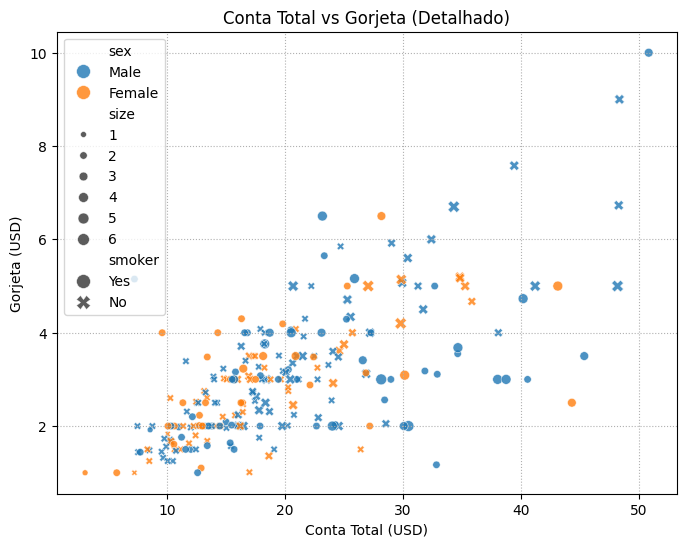

In [21]:
# Scatterplot com Seaborn (Total da Conta vs Gorjeta, por sexo e fumante)
plt.figure(figsize=(8, 6)) # Pode usar plt para ajustar tamanho
sns.scatterplot(x='total_bill', y='tip', hue='sex', size='size', # size = número de pessoas na mesa
                style='smoker', data=tips, alpha=0.8, s=100) # s global marker size
plt.title('Conta Total vs Gorjeta (Detalhado)')
plt.xlabel('Conta Total (USD)')
plt.ylabel('Gorjeta (USD)')
plt.grid(True, linestyle=':')
plt.show()

* **Gráficos de Distribuição (`sns.histplot()`, `sns.kdeplot()`, `sns.displot()`):** Visualiza a distribuição de uma ou mais variáveis.

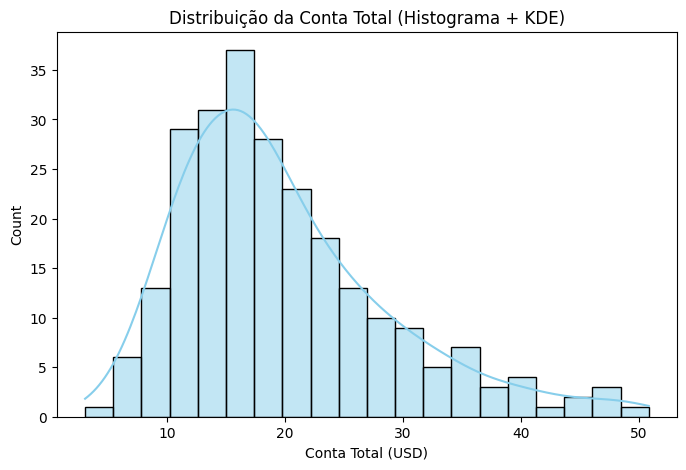

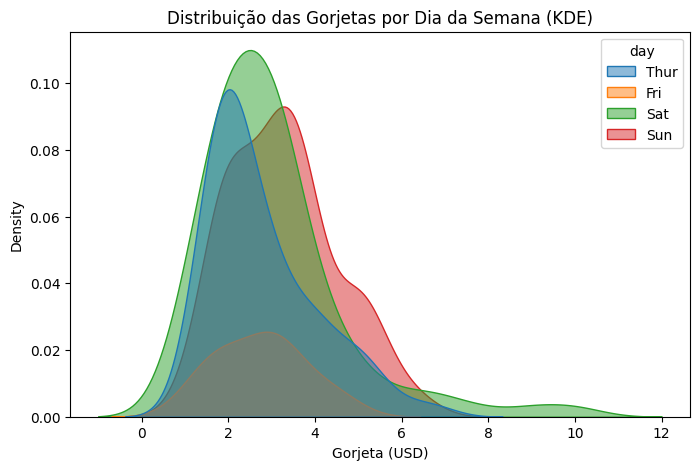

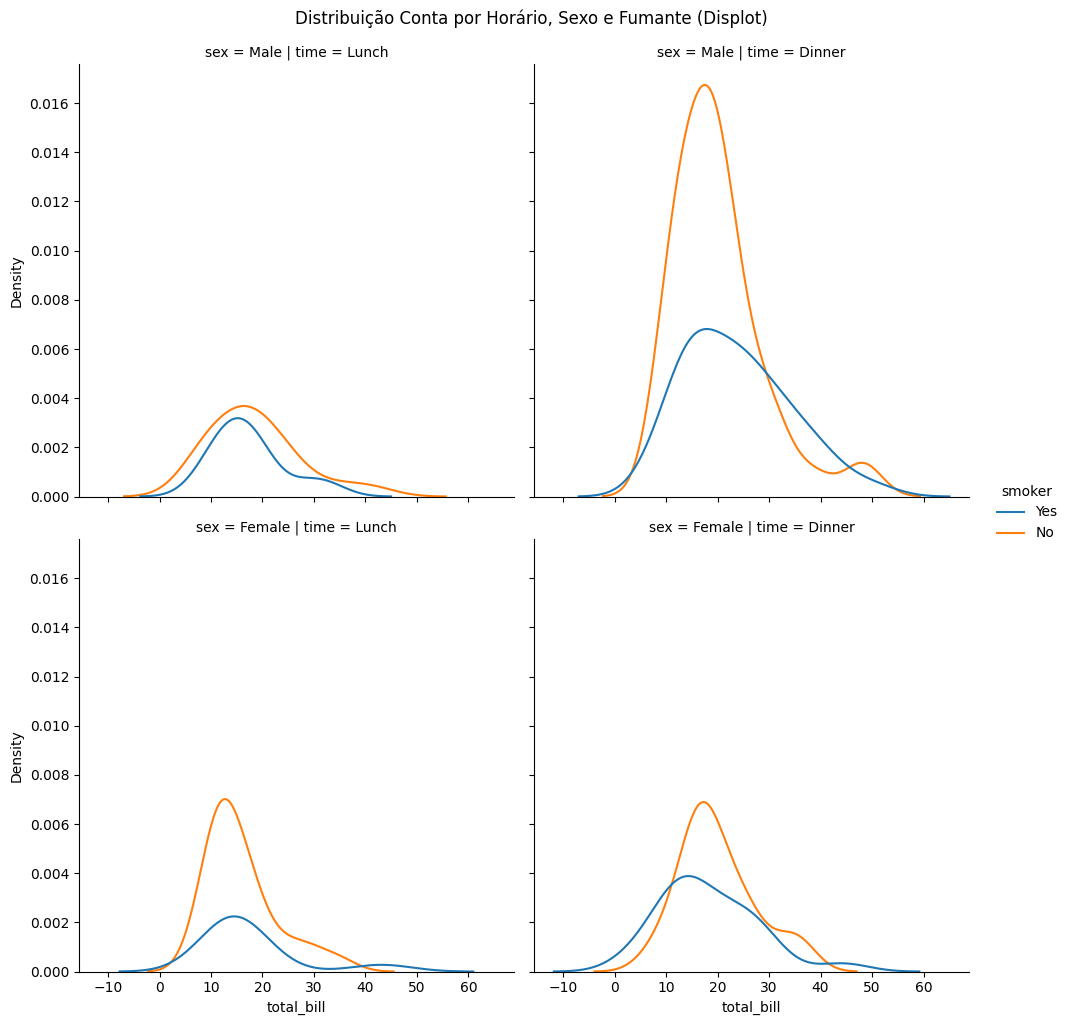

In [22]:
# Gráficos de Distribuição com Seaborn

# Histograma com curva KDE sobreposta
plt.figure(figsize=(8, 5))
sns.histplot(tips['total_bill'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição da Conta Total (Histograma + KDE)')
plt.xlabel('Conta Total (USD)')
plt.show()

# KDE Plot (Estimativa de Densidade Kernel) por categoria (dia)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=tips, x='tip', hue='day', fill=True, alpha=0.5)
plt.title('Distribuição das Gorjetas por Dia da Semana (KDE)')
plt.xlabel('Gorjeta (USD)')
plt.show()

# displot - Figura de nível superior que pode criar vários tipos (hist, kde, ecdf)
sns.displot(data=tips, x='total_bill', col='time', row='sex', kind='kde', hue='smoker')
# Cria múltiplos subplots baseados nas colunas 'time' e 'sex'
plt.suptitle('Distribuição Conta por Horário, Sexo e Fumante (Displot)', y=1.02)
plt.show()

* **Gráficos Categóricos (`sns.barplot()`, `sns.countplot()`, `sns.boxplot()`, `sns.violinplot()`):** Compara distribuições ou métricas entre categorias.

<ipython-input-23-3d86e6517ed8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data=tips, ax=axs[0, 0], palette='viridis', errorbar='sd') # errorbar='sd' para desvio padrão


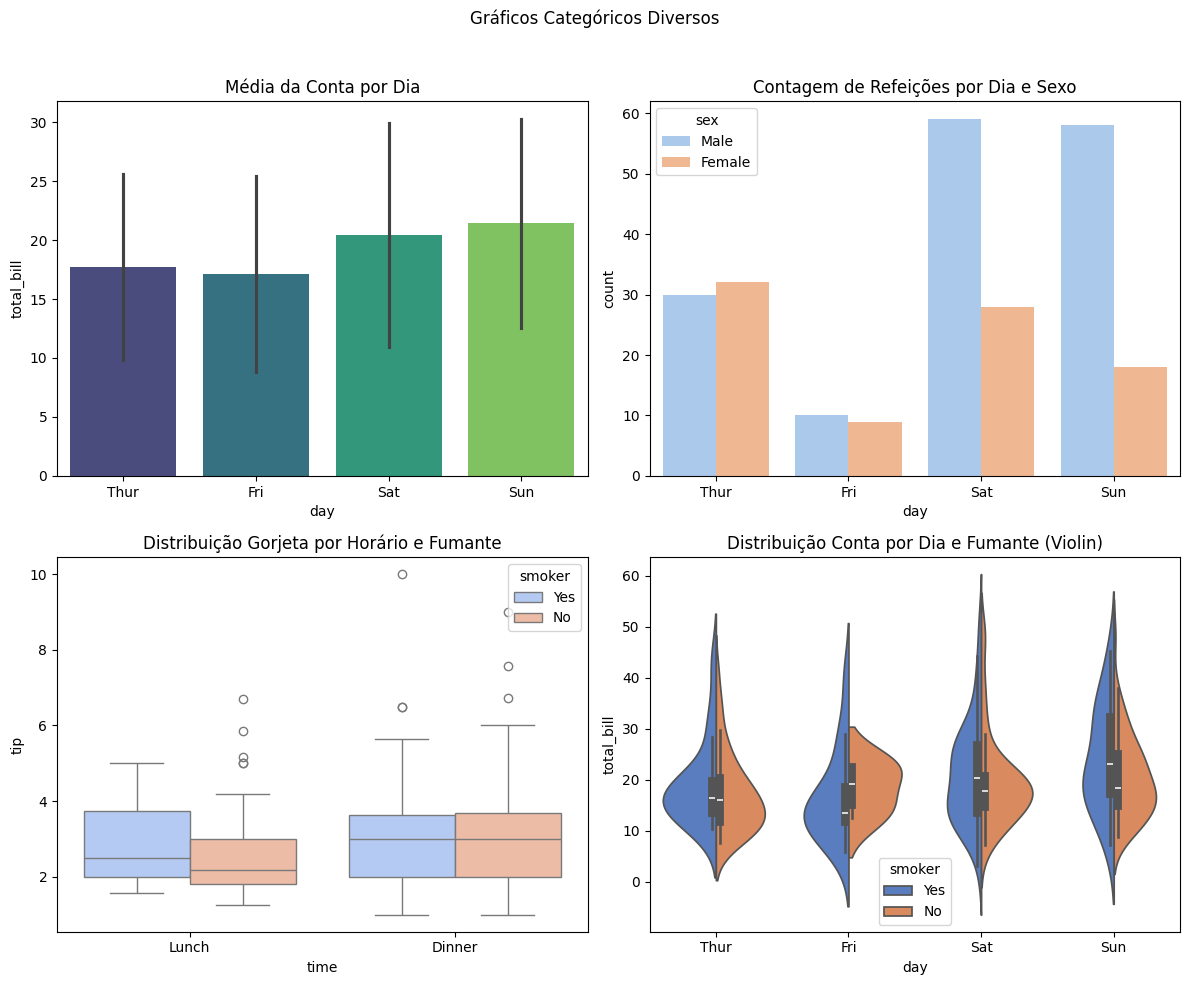

In [23]:
# Gráficos Categóricos com Seaborn
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Gráficos Categóricos Diversos')

# Barplot (mostra média e intervalo de confiança por padrão)
sns.barplot(x='day', y='total_bill', data=tips, ax=axs[0, 0], palette='viridis', errorbar='sd') # errorbar='sd' para desvio padrão
axs[0, 0].set_title('Média da Conta por Dia')

# Countplot (conta ocorrências)
sns.countplot(x='day', data=tips, ax=axs[0, 1], hue='sex', palette='pastel')
axs[0, 1].set_title('Contagem de Refeições por Dia e Sexo')

# Boxplot (mostra quartis, mediana, outliers)
sns.boxplot(x='time', y='tip', data=tips, ax=axs[1, 0], hue='smoker', palette='coolwarm')
axs[1, 0].set_title('Distribuição Gorjeta por Horário e Fumante')

# Violinplot (combina boxplot com KDE)
sns.violinplot(x='day', y='total_bill', data=tips, ax=axs[1, 1], hue='smoker', split=True, palette='muted') # split=True separa smokers/non-smokers
axs[1, 1].set_title('Distribuição Conta por Dia e Fumante (Violin)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* **Gráficos de Relação (`sns.relplot()`, `sns.lineplot()`):** Visualiza relações entre variáveis, frequentemente com uma dimensão categórica (`hue`). `relplot` é uma figura de nível superior.

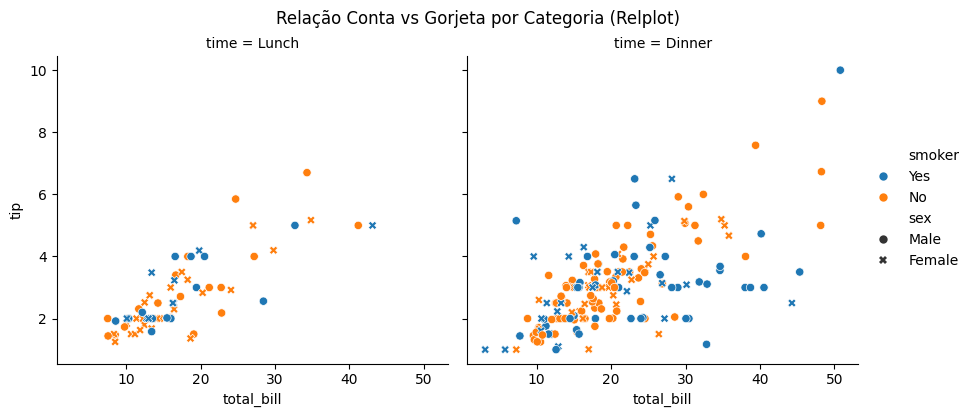

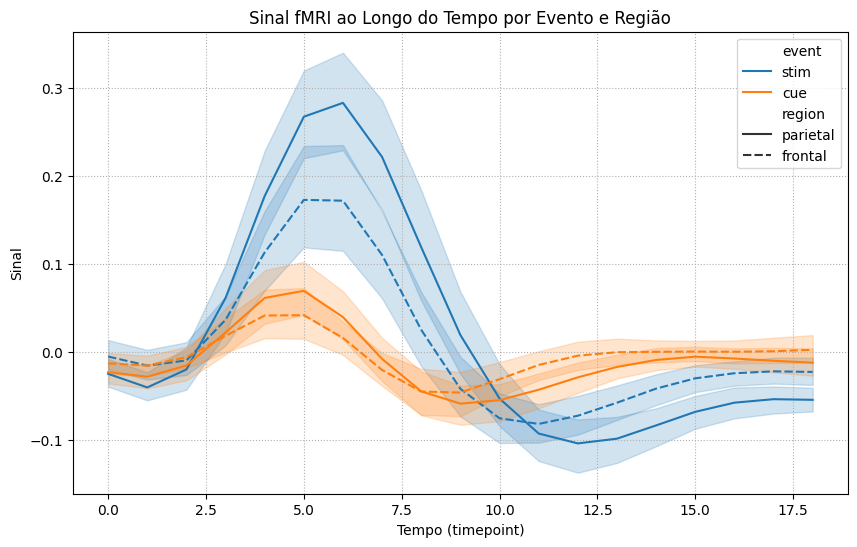

In [24]:
# Gráficos de Relação com Seaborn

# relplot (nível da figura) para scatter ou line. Permite 'col' e 'row' para facetas.
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='sex', col='time', kind='scatter', height=4, aspect=1.1) # Cria colunas separadas para 'Lunch' e 'Dinner'
plt.suptitle('Relação Conta vs Gorjeta por Categoria (Relplot)', y=1.03)
plt.show()

# lineplot (nível do Axes) - bom para séries temporais ou tendências médias
# Usando outro dataset exemplo do Seaborn
fmri = sns.load_dataset("fmri")
plt.figure(figsize=(10, 6))
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", style="region", errorbar=('ci', 95)) # ci=95 mostra intervalo de confiança 95%
plt.title('Sinal fMRI ao Longo do Tempo por Evento e Região')
plt.ylabel('Sinal')
plt.xlabel('Tempo (timepoint)')
plt.grid(True, linestyle=':')
plt.show()

* **Mapas de Calor (`sns.heatmap()`):** Visualiza matrizes de dados onde valores são representados por cores. Ideal para matrizes de correlação.

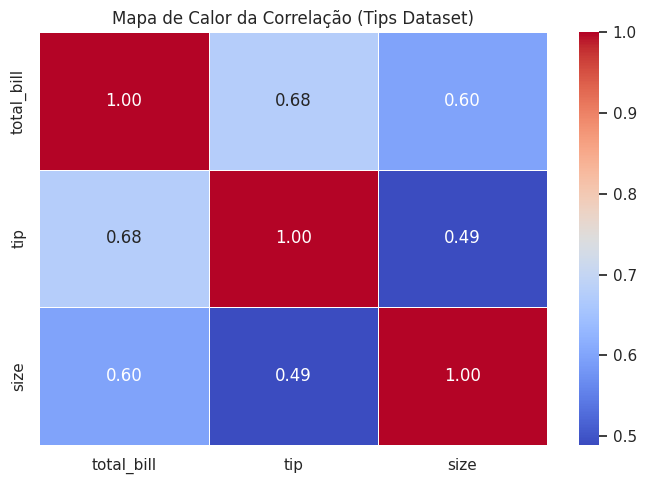

In [31]:
# Mapa de Calor (Matriz de Correlação do dataset 'tips')
# Seleciona apenas colunas numéricas para correlação
tips_numeric = tips[['total_bill', 'tip', 'size']]
correlation_matrix = tips_numeric.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# annot=True mostra os valores, cmap define as cores, fmt formata os números
plt.title('Mapa de Calor da Correlação (Tips Dataset)')
plt.show()

* **Pairplot (`sns.pairplot()`):** Cria uma matriz de gráficos mostrando relações par-a-par e distribuições univariadas. Ótimo para EDA rápido.

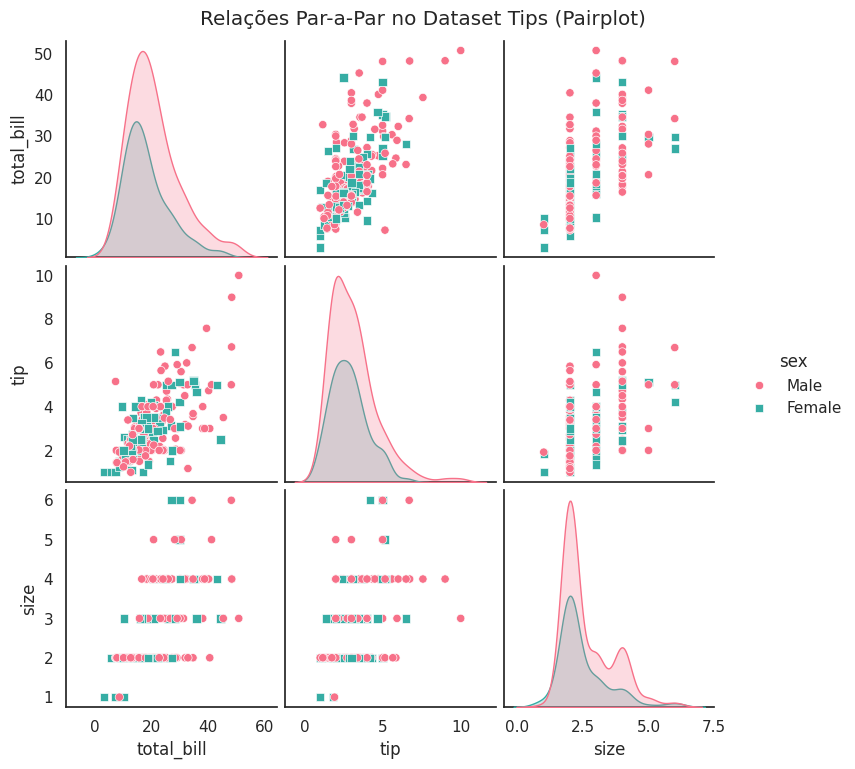

In [30]:
# Pairplot (visualização par-a-par)
# Mostra scatter plots para cada par de variáveis e histograma/KDE na diagonal
sns.pairplot(tips, hue='sex', diag_kind='kde', palette='husl', markers=['o', 's'], height=2.5) # diag_kind='hist' também é comum
plt.suptitle('Relações Par-a-Par no Dataset Tips (Pairplot)', y=1.02)
plt.show()

**(c) Personalização de Gráficos Seaborn**

Embora Seaborn tenha bons padrões, pode ser personalizado.

* **Paletas de Cores:** `sns.set_palette()`, `sns.color_palette()`, argumento `palette` nas funções.

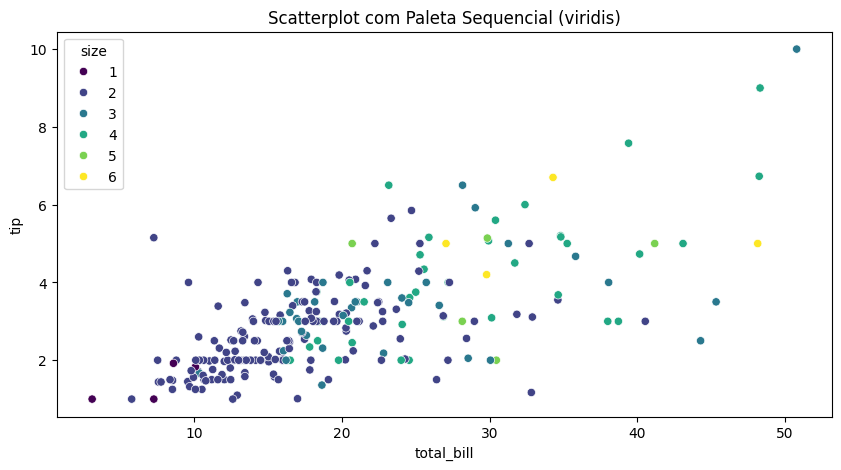

<ipython-input-27-06133977248e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x='day', y='tip', palette='Set2')


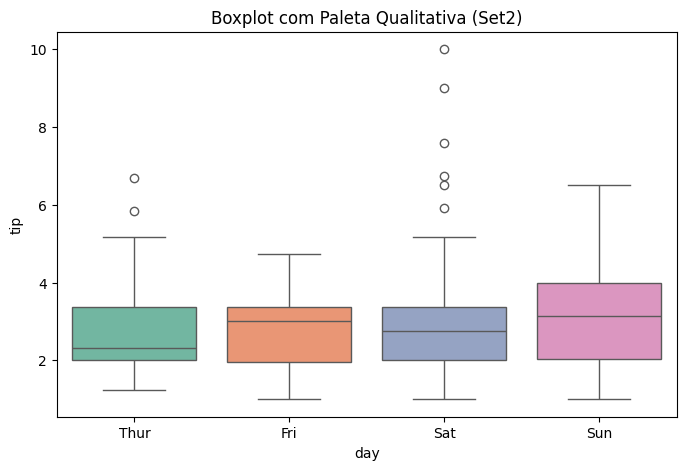

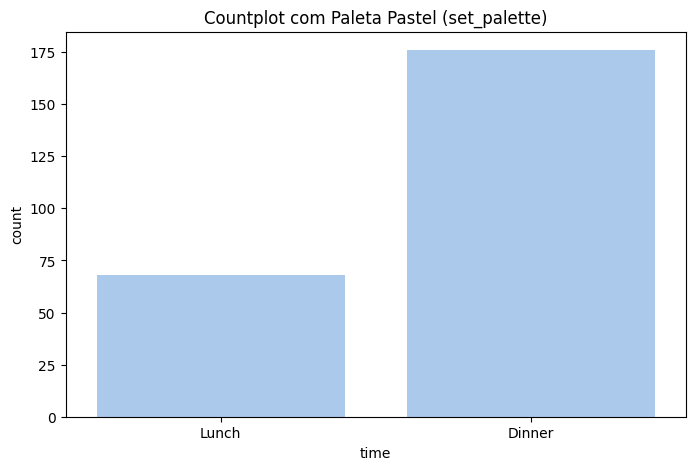

In [27]:
# Usando Paletas de Cores Seaborn
plt.figure(figsize=(10, 5))

# Usando paleta sequencial para 'size'
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', palette='viridis')
plt.title('Scatterplot com Paleta Sequencial (viridis)')
plt.show()

plt.figure(figsize=(8, 5))
# Usando paleta qualitativa para 'day'
sns.boxplot(data=tips, x='day', y='tip', palette='Set2')
plt.title('Boxplot com Paleta Qualitativa (Set2)')
plt.show()

# Definindo paleta padrão para os próximos gráficos
sns.set_palette('pastel')
plt.figure(figsize=(8,5))
sns.countplot(data=tips, x='time')
plt.title('Countplot com Paleta Pastel (set_palette)')
plt.show()
sns.set_palette('deep') # Resetar para padrão ou outra

* **Estilos:** `sns.set_style()` (e.g., 'darkgrid', 'whitegrid', 'white', 'ticks', 'dark').

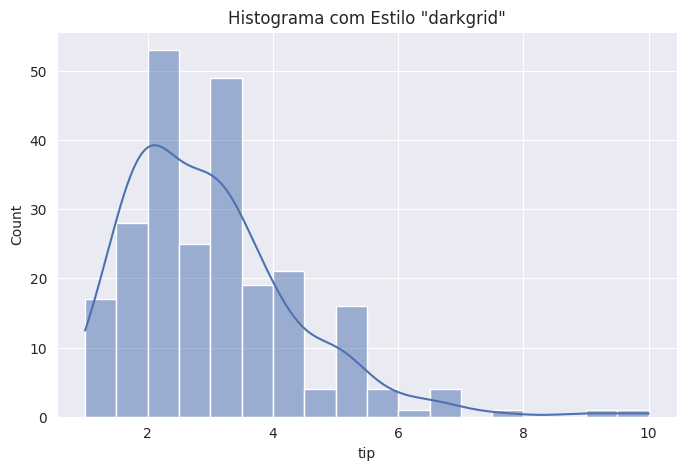

In [28]:
# Usando Estilos Seaborn
sns.set_style('darkgrid') # Define o estilo
plt.figure(figsize=(8, 5))
sns.histplot(tips['tip'], kde=True)
plt.title('Histograma com Estilo "darkgrid"')
plt.show()
sns.set_style('white') # Volta para um estilo mais limpo

* **Escalas (Contexto):** `sns.set_context()` (e.g., 'paper', 'notebook', 'talk', 'poster') ajusta tamanho de fontes, linhas, etc.

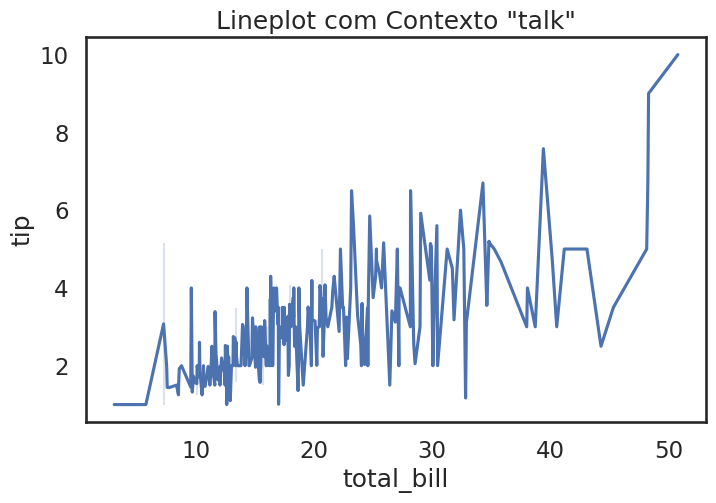

In [29]:
# Usando Contexto Seaborn
sns.set_context('talk') # Aumenta os elementos para apresentação
plt.figure(figsize=(8, 5))
sns.lineplot(data=tips, x='total_bill', y='tip')
plt.title('Lineplot com Contexto "talk"')
plt.show()
sns.set_context('notebook') # Volta ao padrão

**(d) Integração com DataFrames Pandas**

Seaborn é projetado para aceitar DataFrames diretamente, usando nomes de colunas como strings nos argumentos `x`, `y`, `hue`, `size`, `style`, `data`, etc. Isso torna a plotagem a partir de dados organizados muito mais simples.

**3. Comparação e Contraste entre Matplotlib e Seaborn** (Renumerado de 3 para 4)

| Característica      | Matplotlib                                  | Seaborn                                                         |
| :------------------ | :------------------------------------------ | :-------------------------------------------------------------- |
| Nível de Abstração  | Baixo (mais controle)                       | Alto (mais fácil para gráficos comuns)                         |
| Foco                | Criação de gráficos genéricos               | Criação de gráficos estatísticos                                |
| Estética Padrão     | Mais simples, requer mais personalização    | Mais atraente e moderno por padrão                            |
| Código para Gráficos | Mais código para gráficos estatísticos comuns | Menos código para gráficos estatísticos comuns                  |
| Integração Pandas   | Menos direta                                | Altamente integrada, uso direto de colunas do DataFrame       |
| Tipos de Gráficos   | Grande variedade, controle total            | Focado em estatística, com tipos específicos não padrão      |

**Regra geral:**
* Use **Matplotlib** para: Controle fino sobre cada detalhe, gráficos altamente personalizados, tipos de gráficos não-padrão ou não estatísticos.
* Use **Seaborn** para: Visualizações estatísticas rápidas e atraentes, EDA (Análise Exploratória de Dados), plots complexos com menos código, quando trabalhando principalmente com DataFrames Pandas.
* **Use Ambos:** É muito comum usar Seaborn para criar o gráfico principal e depois usar Matplotlib (`plt` ou métodos `ax`) para ajustes finos (títulos, rótulos, limites, anotações).

**4. Conclusão** (Renumerado de 5 para 5)

A visualização de dados é fundamental para a análise e comunicação eficaz de informações. Matplotlib e Seaborn são bibliotecas essenciais em Python para essa finalidade. Matplotlib oferece a base e o controle para criar qualquer tipo de gráfico, enquanto Seaborn simplifica a criação de visualizações estatísticas com melhor estética e integração com Pandas. A escolha entre elas depende das necessidades específicas do projeto, sendo comum utilizá-las em conjunto para aproveitar o melhor de cada uma, especialmente no fluxo de trabalho de ciência de dados.

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://discourse.julialang.org/t/pyplot-error-plot-3d-line/5668">https://discourse.julialang.org/t/pyplot-error-plot-3d-line/5668</a></li>
  </ol>
</div>